In [1]:
import torch

In [1]:
import json
import torch
import numpy as np

def load_jsonl(input_path) -> list:
    """
    Read list of objects from a JSON lines file.
    """
    data = []
    with open(input_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.rstrip('\n|\r')))
    print('Loaded {} records from {}'.format(len(data), input_path))
    return data

In [25]:
with open('dataset/bfly/train_original.json', 'rb') as r:
    train = json.load(r)

In [61]:
import collections

In [62]:
sets = [a['category'] for a in train['documents']]

In [63]:
collections.Counter(sets)

Counter({'종합': 197022,
         '스포츠': 5455,
         '정치': 18007,
         '사회': 19649,
         '경제': 27286,
         '교육/입시/NIE': 1190,
         '선거': 2,
         '기업': 17,
         '보건/의료': 55,
         '부동산': 74,
         '북한/한반도정세': 5,
         'IT,과학': 2331})

In [64]:
280697 - (197022 + 18007 + 27286 + 19649)

18733

In [9]:
dates = [article['publish_date'] for article in train['documents']]

In [13]:
sorted(dates)[0], sorted(dates)[-1]

('2017-01-06 08:31:00', '2019-12-31 23:03:00')

In [22]:
train = load_jsonl(f'dataset/bfly/train.jsonl')
val = load_jsonl(f'dataset/bfly/test.jsonl')

Loaded 260697 records from dataset/bfly/train.jsonl
Loaded 10000 records from dataset/bfly/test.jsonl


In [15]:
sents = [t['article_original'] for t in train]

In [16]:
lens = [len(s) for s in sents]

In [18]:
np.mean(lens)

12.659792786261445

In [19]:
np.std(lens)

5.3866229375172585

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='Count'>

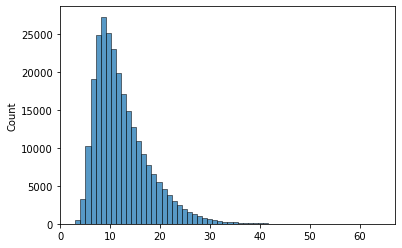

In [23]:
sns.histplot(lens, bins=60)

In [24]:
trainset = torch.load('dataset/bfly/bert_data/train_dataset.pt')

In [29]:
np.std([len(t) for t in trainset if len(t) >= 6])

5.342639185024764